Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
import pandas as pd

Loading DataSet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Gurjeetkaur31/Titanic_Survival/master/titanic_prepared_data.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Model 1: Multiclass Logistic Regression

In [3]:
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel()) 
y_pred_log_reg = clf.predict(X_test)
model1_acc = accuracy_score(y_pred_log_reg, y_test)
print model1_acc*100, "%"

80.269058296 %


# Model 2: KNN

In [4]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
y_pred_knn = clf.predict(X_test)
model2_acc = accuracy_score(y_pred_knn, y_test) 
print model2_acc*100, "%"

73.0941704036 %


# Model3: Gaussian Naive Bayes

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train.ravel())
y_pred_gnb = clf.predict(X_test)
model3_acc = accuracy_score(y_pred_gnb, y_test)
print model3_acc*100, "%"

75.7847533632 %


# Model 4: Decision Tree

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())
y_pred_decision_tree = clf.predict(X_test)
model4_acc = accuracy_score(y_pred_decision_tree, y_test) 
print model4_acc*100, "%"

74.8878923767 %


# Model 5: Random Forest

In [10]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.ravel())
y_pred_random_forest = clf.predict(X_test)
model5_acc  = accuracy_score(y_pred_random_forest, y_test) 
print model5_acc*100, "%"

80.269058296 %


# Comparing Models (Plotting accuracy)

In [11]:
# dictionary to plot bar graph
classifiers = {'Logistic Regression':model1_acc,
              'K Nearest Neghbour':model2_acc,
              'Gaussian Naive Bayes':model3_acc,
              'Decision Tree':model4_acc,
              'Random Forest':model5_acc}

In [12]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [model1_acc, model2_acc,  model3_acc, model3_acc, model5_acc]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.802691
4,Naive Bayes,0.802691
2,Decision Tree,0.757848
3,Random Forest,0.757848
1,KNN,0.730942


# BarPlot: Different Algorithms vs Accuracy Score

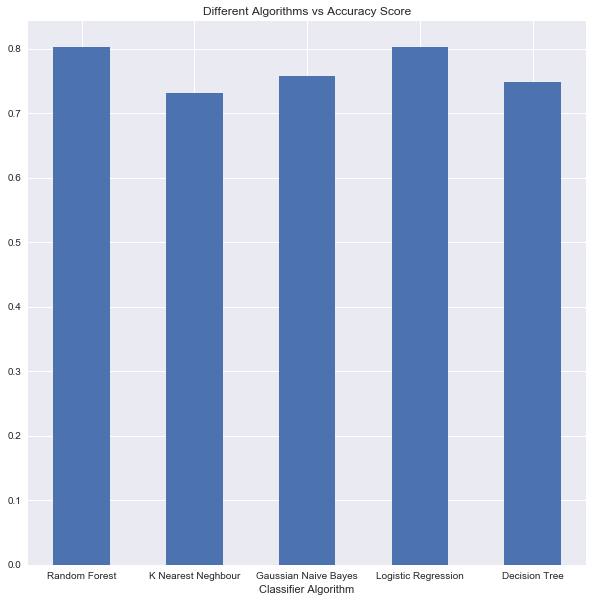

In [13]:
plt.figure(figsize=(10, 10))

plt.bar(range(len(classifiers)), classifiers.values(),align='center', width=0.5)

plt.xticks(range(len(classifiers)), classifiers.keys())

plt.xlabel('Classifier Algorithm')

plt.title('Different Algorithms vs Accuracy Score')

plt.show()